# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import os

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import joblib
from sklearn.model_selection import GridSearchCV


from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
path = kagglehub.dataset_download("shreyasvedpathak/pcos-dataset")

print("Path to dataset files:", path)
df = pd.read_csv(os.path.join(path, 'PCOS_data.csv'))

100%|██████████| 27.5k/27.5k [00:00<00:00, 31.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/shreyasvedpathak/pcos-dataset/versions/1


In [3]:
df.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.9,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.3,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.7,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.1,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [5]:
df.describe()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,540.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,271.000000,0.327172,31.430684,59.637153,156.484835,24.307579,13.802218,73.247689,19.243993,...,0.489834,0.514815,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,156.317519,156.317519,0.469615,5.411006,11.028287,6.033545,4.055129,1.840812,4.430285,1.688629,...,0.500359,0.500244,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,1.000000,1.000000,0.000000,20.000000,31.000000,137.000000,12.400000,11.000000,13.000000,16.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,136.000000,0.000000,28.000000,52.000000,152.000000,21.600000,13.000000,72.000000,18.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,271.000000,0.000000,31.000000,59.000000,156.000000,24.200000,14.000000,72.000000,18.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,406.000000,1.000000,35.000000,65.000000,160.000000,26.600000,15.000000,74.000000,20.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,541.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


In [6]:
df.describe()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,540.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,271.000000,0.327172,31.430684,59.637153,156.484835,24.307579,13.802218,73.247689,19.243993,...,0.489834,0.514815,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,156.317519,156.317519,0.469615,5.411006,11.028287,6.033545,4.055129,1.840812,4.430285,1.688629,...,0.500359,0.500244,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,1.000000,1.000000,0.000000,20.000000,31.000000,137.000000,12.400000,11.000000,13.000000,16.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,136.000000,0.000000,28.000000,52.000000,152.000000,21.600000,13.000000,72.000000,18.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,271.000000,0.000000,31.000000,59.000000,156.000000,24.200000,14.000000,72.000000,18.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,406.000000,1.000000,35.000000,65.000000,160.000000,26.600000,15.000000,74.000000,20.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,541.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

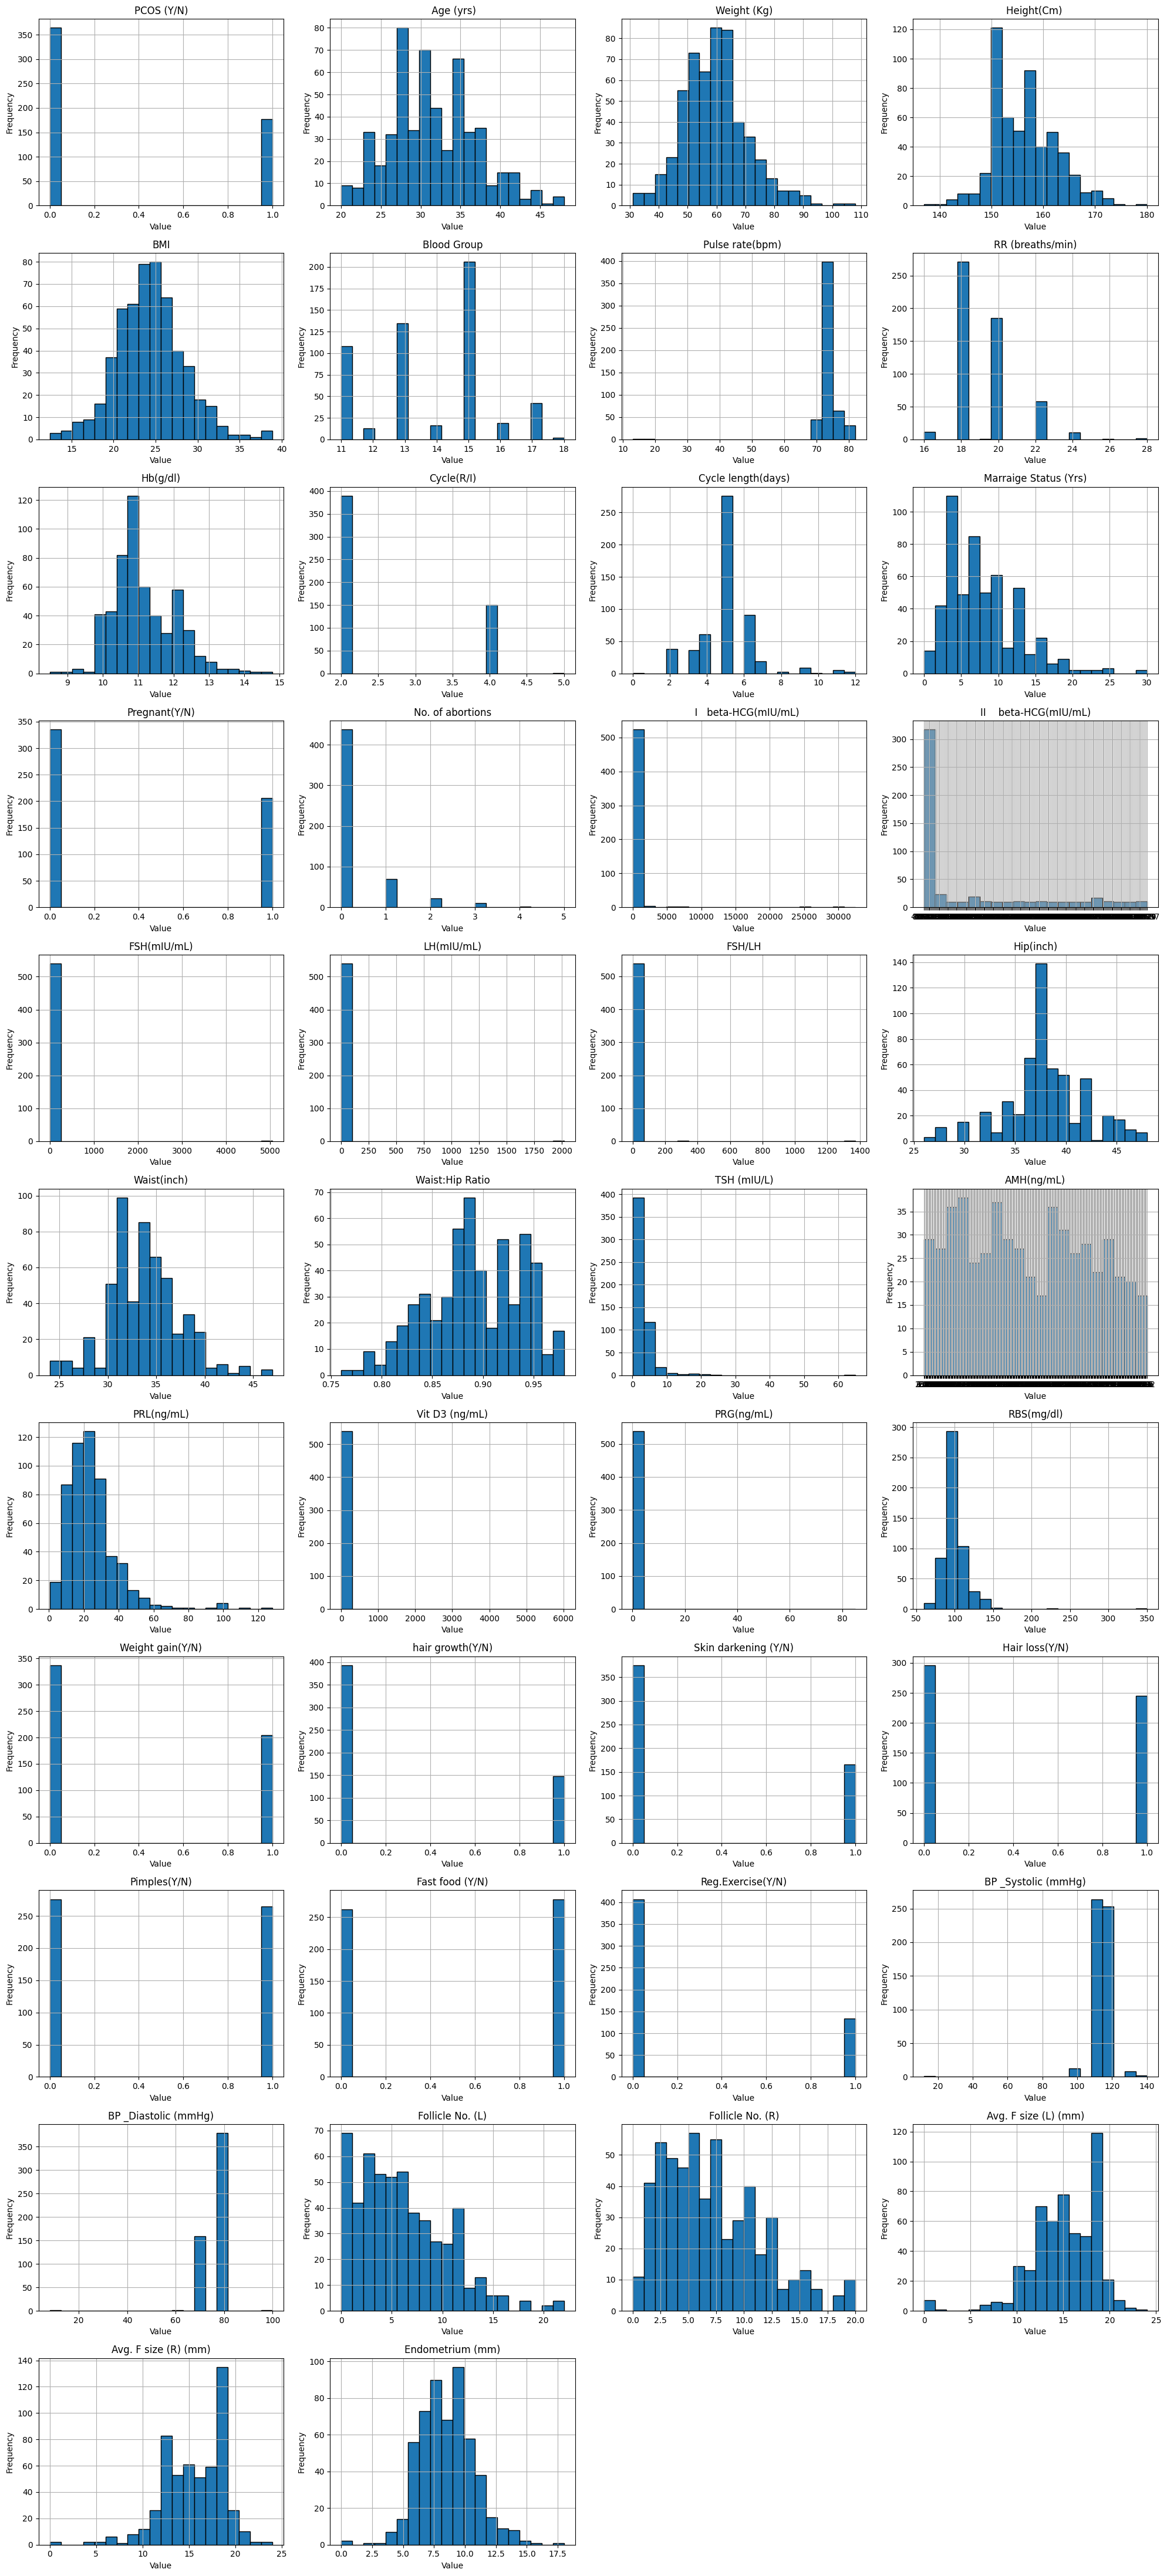

In [7]:
df_hist = df.drop(columns=['Sl. No', 'Patient File No.', 'Unnamed: 44']) # drop karena unik
num_vars = df_hist.shape[1]

n_cols = 4
n_rows = -(-num_vars // n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

axes = axes.flatten()

for i, column in enumerate(df_hist.columns):
    df_hist[column].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

/tmp/ipython-input-3177678347.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['PCOS (Y/N)'], palette='viridis')


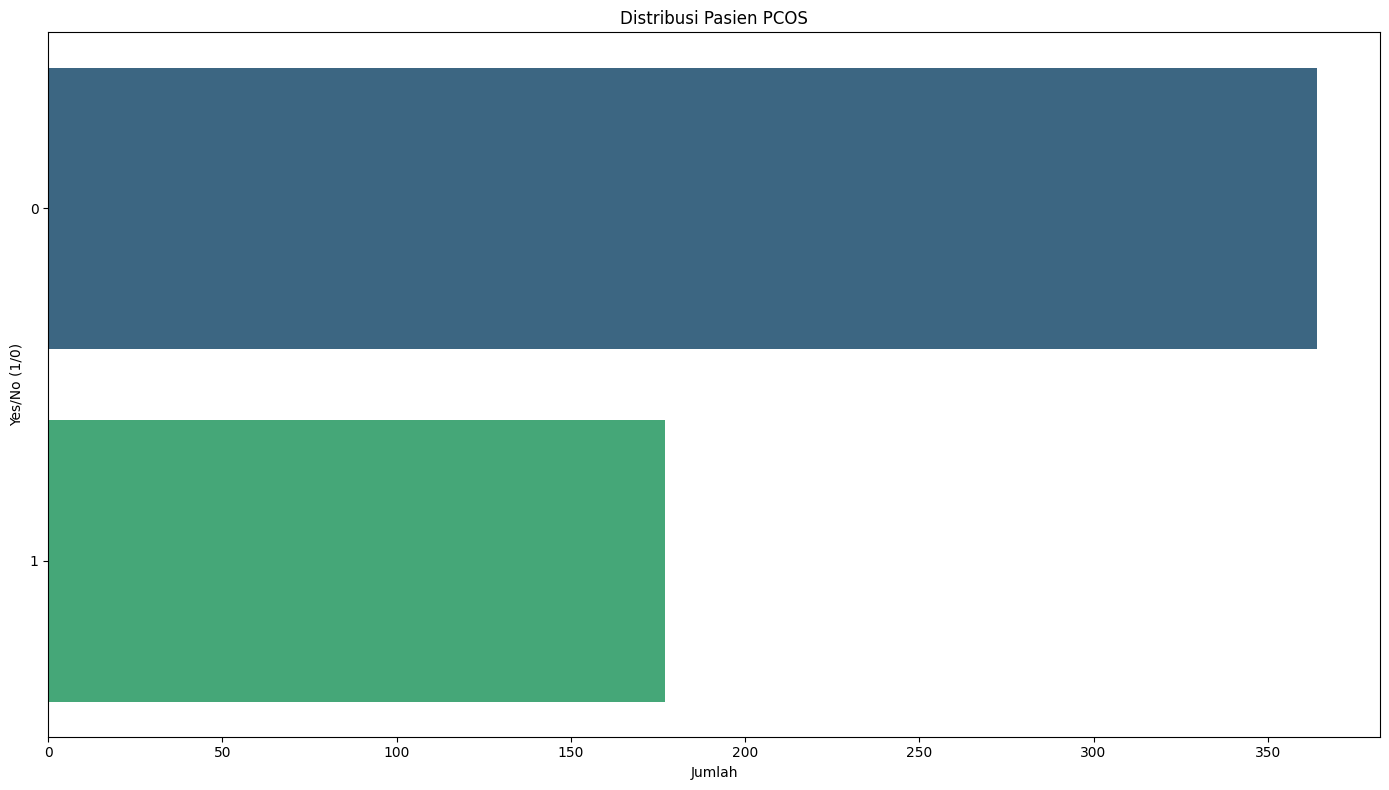

In [8]:
plt.figure(figsize=(14, 8))
sns.countplot(y=df['PCOS (Y/N)'], palette='viridis')
plt.title(f'Distribusi Pasien PCOS')
plt.xlabel('Jumlah')
plt.ylabel('Yes/No (1/0)')
plt.tight_layout()
plt.show()

/tmp/ipython-input-58995948.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_eda[' Age (yrs)'], palette='viridis')


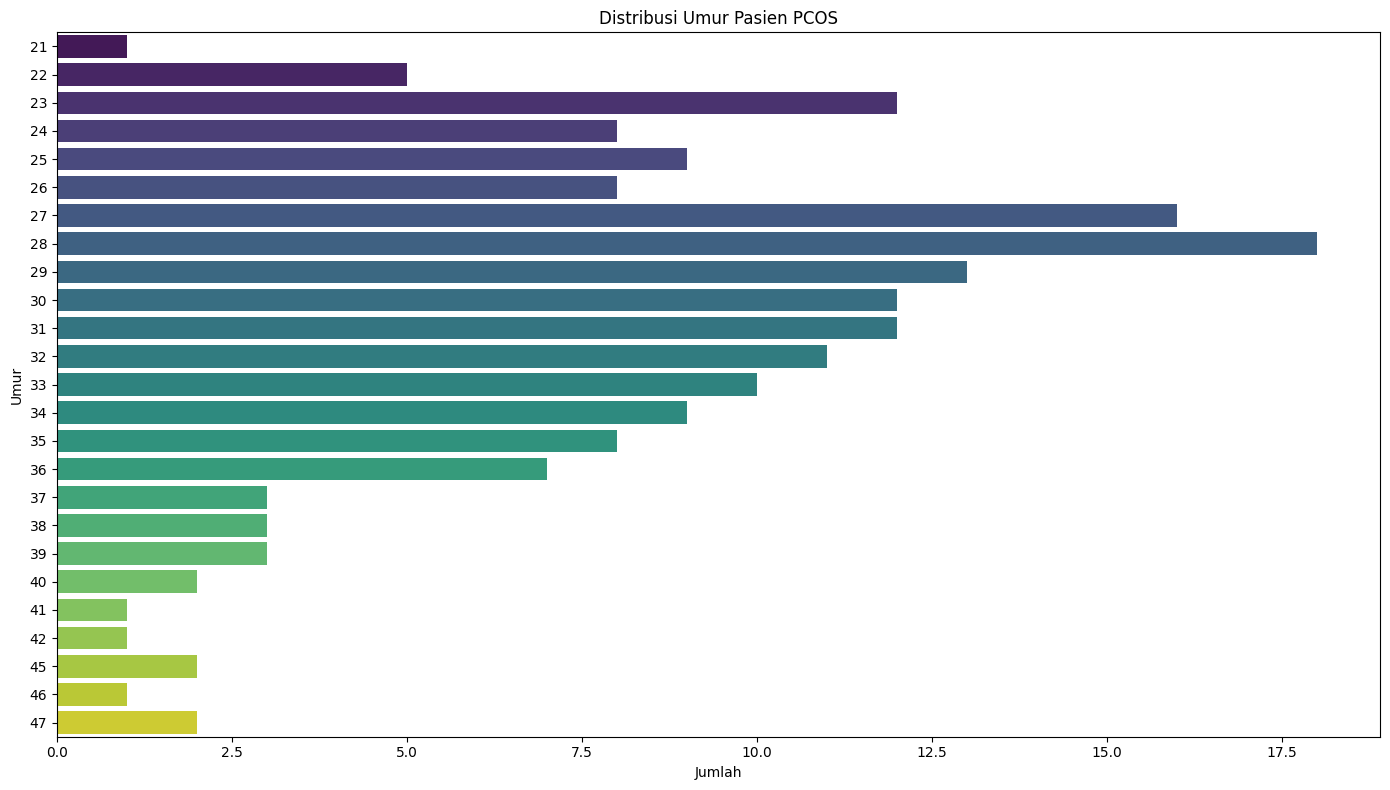

In [9]:
plt.figure(figsize=(14, 8))
df_eda = df[df['PCOS (Y/N)']==1]
sns.countplot(y=df_eda[' Age (yrs)'], palette='viridis')
plt.title(f'Distribusi Umur Pasien PCOS')
plt.xlabel('Jumlah')
plt.ylabel('Umur')
plt.tight_layout()
plt.show()

/tmp/ipython-input-1657927132.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_eda[' Age (yrs)'], palette='viridis')


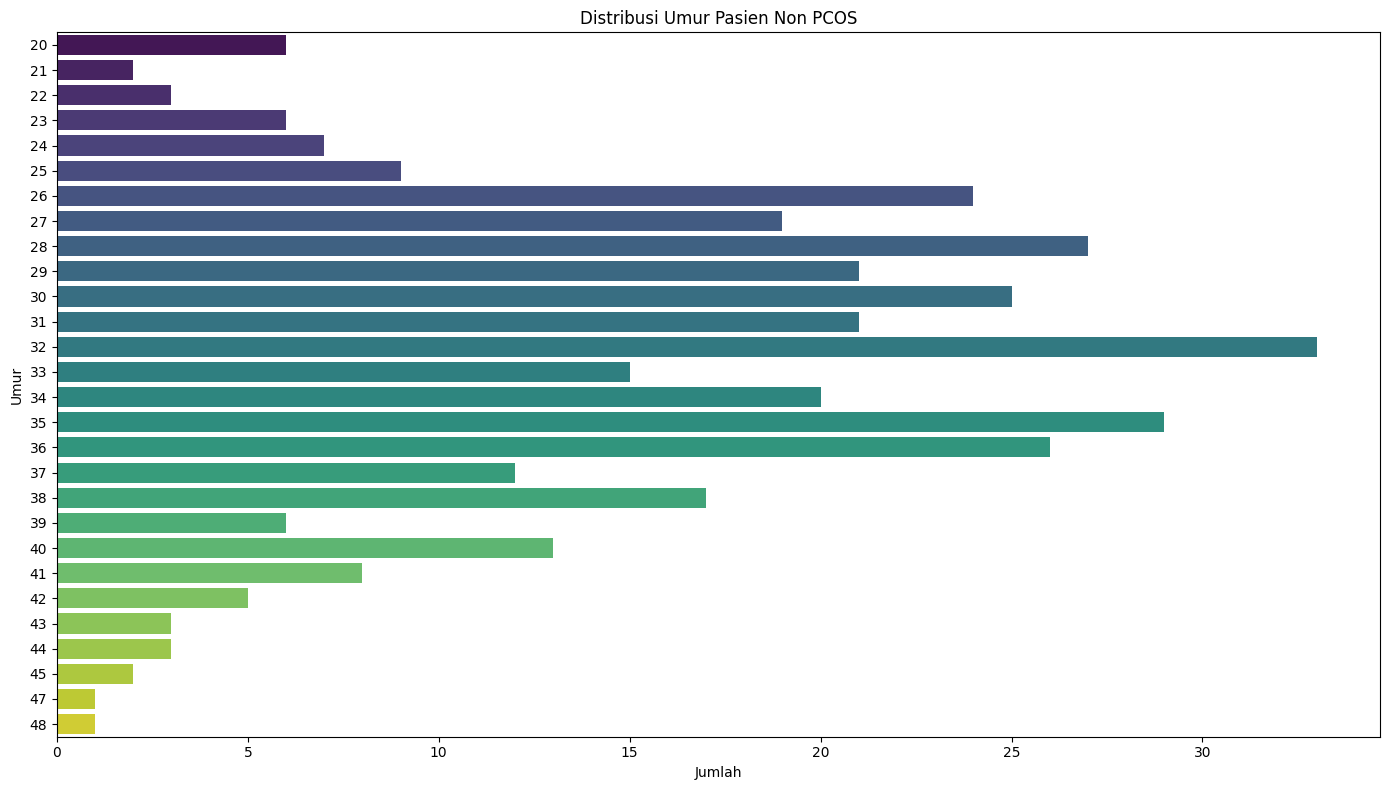

In [10]:
plt.figure(figsize=(14, 8))
df_eda = df[df['PCOS (Y/N)']==0]
sns.countplot(y=df_eda[' Age (yrs)'], palette='viridis')
plt.title(f'Distribusi Umur Pasien Non PCOS')
plt.xlabel('Jumlah')
plt.ylabel('Umur')
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [11]:
df.isnull().sum()

,0
Sl. No,0
Patient File No.,0
PCOS (Y/N),0
Age (yrs),0
Weight (Kg),0
Height(Cm),0
BMI,0
Blood Group,0
Pulse rate(bpm),0
RR (breaths/min),0


In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df['AMH(ng/mL)'] = pd.to_numeric(df['AMH(ng/mL)'], errors='coerce')
df['II    beta-HCG(mIU/mL)'] = pd.to_numeric(df['II    beta-HCG(mIU/mL)'], errors='coerce')
num_cols =  df.select_dtypes(include=['number']).columns

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[df.select_dtypes(include='number').columns])

In [14]:
df.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,-1.728852,-1.728852,-0.697326,-0.634606,-1.364770,-0.744005,-1.236018,0.651284,1.073680,1.633608,...,0.970797,-0.573793,-0.631866,0.551645,-0.740617,-0.821471,0.836776,0.768537,0.011133,NaN
1,-1.722449,-1.722449,-0.697326,0.845230,0.486731,0.831983,0.146227,0.651284,0.169968,0.448119,...,-1.030082,-0.573793,0.723565,-1.244023,-0.740617,-0.370287,-0.005083,-0.437816,-2.207618,NaN
2,-1.716046,-1.716046,1.434049,0.290291,0.831618,1.412610,0.244959,-1.523682,-0.281888,-0.737370,...,0.970797,-0.573793,0.723565,0.551645,1.626032,1.885630,0.836776,1.371714,0.704493,NaN
3,-1.709643,-1.709643,-0.697326,1.030210,0.486731,-1.407579,1.331009,-0.436199,-0.281888,0.448119,...,-1.030082,-0.573793,0.723565,-1.244023,-0.977282,-1.047063,-0.005083,-0.437816,-0.451107,NaN
4,-1.703240,-1.703240,-0.697326,-1.189545,-0.693147,0.749036,-1.038555,-1.523682,-0.281888,-0.737370,...,-1.030082,-0.573793,0.723565,0.551645,-0.740617,-0.595879,0.275536,-0.437816,-0.682227,NaN


In [15]:
# Drop kolom ID dan kolom tidak berjudul
df.drop('Sl. No', axis=1, inplace=True)
df.drop('Patient File No.', axis=1, inplace=True)
df.drop('Unnamed: 44', axis=1, inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCOS (Y/N)              541 non-null    float64
 1    Age (yrs)              541 non-null    float64
 2   Weight (Kg)             541 non-null    float64
 3   Height(Cm)              541 non-null    float64
 4   BMI                     541 non-null    float64
 5   Blood Group             541 non-null    float64
 6   Pulse rate(bpm)         541 non-null    float64
 7   RR (breaths/min)        541 non-null    float64
 8   Hb(g/dl)                541 non-null    float64
 9   Cycle(R/I)              541 non-null    float64
 10  Cycle length(days)      541 non-null    float64
 11  Marraige Status (Yrs)   540 non-null    float64
 12  Pregnant(Y/N)           541 non-null    float64
 13  No. of abortions        541 non-null    float64
 14    I   beta-HCG(mIU/mL)  541 non-null    fl

In [17]:
df.columns.tolist()

['PCOS (Y/N)',
 ' Age (yrs)',
 'Weight (Kg)',
 'Height(Cm) ',
 'BMI',
 'Blood Group',
 'Pulse rate(bpm) ',
 'RR (breaths/min)',
 'Hb(g/dl)',
 'Cycle(R/I)',
 'Cycle length(days)',
 'Marraige Status (Yrs)',
 'Pregnant(Y/N)',
 'No. of abortions',
 '  I   beta-HCG(mIU/mL)',
 'II    beta-HCG(mIU/mL)',
 'FSH(mIU/mL)',
 'LH(mIU/mL)',
 'FSH/LH',
 'Hip(inch)',
 'Waist(inch)',
 'Waist:Hip Ratio',
 'TSH (mIU/L)',
 'AMH(ng/mL)',
 'PRL(ng/mL)',
 'Vit D3 (ng/mL)',
 'PRG(ng/mL)',
 'RBS(mg/dl)',
 'Weight gain(Y/N)',
 'hair growth(Y/N)',
 'Skin darkening (Y/N)',
 'Hair loss(Y/N)',
 'Pimples(Y/N)',
 'Fast food (Y/N)',
 'Reg.Exercise(Y/N)',
 'BP _Systolic (mmHg)',
 'BP _Diastolic (mmHg)',
 'Follicle No. (L)',
 'Follicle No. (R)',
 'Avg. F size (L) (mm)',
 'Avg. F size (R) (mm)',
 'Endometrium (mm)']

In [18]:
df.dropna(inplace=True)

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
num_cols =  df.select_dtypes(include=['number']).columns

Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

condition = (df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))
df[num_cols] = df[num_cols].mask(condition)

df.dropna(inplace=True)

In [21]:
X = df.drop('PCOS (Y/N)', axis=1)
y = df['PCOS (Y/N)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# File Automate.py
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from joblib import dump

def automate_Azizah(df, save_path, file_path):
  # Mendapatkan nama kolom tanpa kolom target
  column_names = df.columns.drop('PCOS (Y/N)')

  # Membuat DataFrame kosong dengan nama kolom
  df_header = pd.DataFrame(columns=column_names)

  # Menyimpan nama kolom sebagai header tanpa data
  df_header.to_csv(file_path, index=False)

  print(f"Nama kolom berhasil disimpan ke: {file_path}")

  df['AMH(ng/mL)'] = pd.to_numeric(df['AMH(ng/mL)'], errors='coerce')
  df['II    beta-HCG(mIU/mL)'] = pd.to_numeric(df['II    beta-HCG(mIU/mL)'], errors='coerce')
  num_cols =  df.select_dtypes(include=['number']).columns

  # Pipeline untuk fitur numerik
  numeric_transformer = Pipeline(steps=[
       ('scaler', StandardScaler())
  ])

   # Column Transformer
  preprocessor = ColumnTransformer(
      transformers=[
            ('num', numeric_transformer, num_cols)
      ]
  )

  # scaler = StandardScaler()
  # df[num_cols] = scaler.fit_transform(df[df.select_dtypes(include='number').columns])

  df.drop('Sl. No', axis=1, inplace=True)
  df.drop('Patient File No.', axis=1, inplace=True)
  df.drop('Unnamed: 44', axis=1, inplace=True)

  df.drop_duplicates(inplace=True)
  df.dropna(inplace=True)

  num_cols =  df.select_dtypes(include=['number']).columns

  Q1 = df[num_cols].quantile(0.25)
  Q3 = df[num_cols].quantile(0.75)
  IQR = Q3 - Q1

  condition = (df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))
  df[num_cols] = df[num_cols].mask(condition)

  df.dropna(inplace=True)

  X = df.drop('PCOS (Y/N)', axis=1)
  y = df['PCOS (Y/N)']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Fitting dan transformasi data pada training set
  X_train = preprocessor.fit_transform(X_train)
  # Transformasi data pada testing set
  X_test = preprocessor.transform(X_test)
  # Simpan pipeline
  dump(preprocessor, save_path)

  return X_train, X_test, y_train, y_test

In [ ]:
# .workflow

name: CI MLflow

on:
  push:
    branches:
      - master
  pull_request:
    branches:
      - master

env:
  CSV_URL: "Project/wine-quality.csv"

jobs:
  build:
    runs-on: ubuntu-latest

    steps:
      # Checks-out your repository under $GITHUB_WORKSPACE
      - uses: actions/checkout@v3

      # Setup Python 3.12.7
      - name: Set up Python 3.12.7
        uses: actions/setup-python@v4
        with:
          python-version: "3.12.7"

      # Check Env Variables
      - name: Check Env
        run: |
          echo $CSV_URL

      # Install mlflow
      - name: Install dependencies
        run: |
          python -m pip install --upgrade pip
          pip install mlflow

      # Run as a mlflow project
      - name: Run mlflow project
        run: |
          mlflow run Project --env-manager=local

In [ ]:
# file modelling.py
from preprocess import preprocess_data
import pandas as pd
import mlflow
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import kagglehub

path = kagglehub.dataset_download("shreyasvedpathak/pcos-dataset")

print("Path to dataset files:", path)
df = pd.read_csv(os.path.join(path, 'PCOS_data.csv'))
input_example = df[0:5]

X_train, X_test, y_train, y_test = automate_Azizah(df)

# Set MLflow Tracking URI
mlflow.set_tracking_uri("http://127.0.0.1:5000/")

# Create a new MLflow Experiment
mlflow.set_experiment("Latihan Model Statis")

with mlflow.start_run():
    mlflow.autolog()
    # Parameter Grid untuk GridSearchCV
    param_grid = {
        'n_estimators': [50, 100, 200, 300, 505, 700],
        'max_depth': [5, 10, 15, 20, 25, 37, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    # Inisialisasi dan Grid Search
    # Initialize RandomForestClassifier
    rf = RandomForestClassifier()

    # Perform grid search
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Mendapatkan Parameter dan Model Terbaik
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Log best parameters
    mlflow.log_params(best_params)

    # Train the best model on the training set
    best_model.fit(X_train, y_train)

    # Logging model
    mlflow.sklearn.log_model(
        sk_model=best_model,
        artifact_path="model",
        input_example=input_example
    )

    # Evaluate the model on the test set and log accuracy
    accuracy = best_model.score(X_test, y_test)

In [ ]:
# file modelliing.py
# file modelling_tuning.py
from preprocess import preprocess_data
import pandas as pd
import mlflow
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import kagglehub
import joblib

path = kagglehub.dataset_download("shreyasvedpathak/pcos-dataset")

print("Path to dataset files:", path)
df = pd.read_csv(os.path.join(path, 'PCOS_data.csv'))
input_example = df[0:5]

X_train, X_test, y_train, y_test = automate_Azizah(df)

# Set MLflow Tracking URI
mlflow.set_tracking_uri("http://127.0.0.1:5000/")

# Create a new MLflow Experiment
mlflow.set_experiment("Online Training")

# Nama eksperimen yang ingin dicari
experiment_name = "Online Training PCOS"

experiment = mlflow.get_experiment_by_name(experiment_name)
experiment_id = experiment.experiment_id

# Mendapatkan semua runs dalam eksperimen dan memilih run terbaru
runs = mlflow.search_runs(experiment_ids=[experiment_id], order_by=["start_time DESC"])
latest_run_id = runs.iloc[0]["run_id"]

# Mendapatkan path model dari MLflow artifact
artifact_uri = f"runs:/{latest_run_id}/model_artifacts/online_model.joblib"
local_path = mlflow.artifacts.download_artifacts(artifact_uri)

# Memuat model untuk partial_fit
model = load(local_path)

with mlflow.start_run():
    mlflow.autolog()  # Melakukan logging otomatis

    # Simulasi Online Training
    # Preprocessing data untuk batch
    X_batch = X
    y_batch = y

    # Update model dengan batch berikutnya
    model.partial_fit(X_batch, y_batch)

    # Log metrik setelah setiap batch
    batch_accuracy = model.score(X_batch, y_batch)
    mlflow.log_metric("batch_accuracy", batch_accuracy)
    # Simpan model ke file lokal
    joblib.dump(model, "online_model.joblib")

    # Log file model sebagai artefak ke MLflow
    mlflow.log_artifact("online_model.joblib", artifact_path="model_artifacts")
    # Log model setelah selesai online training
    mlflow.sklearn.log_model(
        sk_model=model,
        artifact_path="online_model",
        input_example=X_batch.iloc[:5]
    )

In [ ]:
# file modelling_tuning.py
from preprocess import preprocess_data
import pandas as pd
import mlflow
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import kagglehub
import joblib

path = kagglehub.dataset_download("shreyasvedpathak/pcos-dataset")

print("Path to dataset files:", path)
df = pd.read_csv(os.path.join(path, 'PCOS_data.csv'))
input_example = df[0:5]

X_train, X_test, y_train, y_test = automate_Azizah(df)

# Set MLflow Tracking URI
mlflow.set_tracking_uri("http://127.0.0.1:5000/")

# Create a new MLflow Experiment
mlflow.set_experiment("Online Training")

# Nama eksperimen yang ingin dicari
experiment_name = "Online Training PCOS"

experiment = mlflow.get_experiment_by_name(experiment_name)
experiment_id = experiment.experiment_id

# Mendapatkan semua runs dalam eksperimen dan memilih run terbaru
runs = mlflow.search_runs(experiment_ids=[experiment_id], order_by=["start_time DESC"])
latest_run_id = runs.iloc[0]["run_id"]

# Mendapatkan path model dari MLflow artifact
artifact_uri = f"runs:/{latest_run_id}/model_artifacts/online_model.joblib"
local_path = mlflow.artifacts.download_artifacts(artifact_uri)

# Memuat model untuk partial_fit
model = load(local_path)

with mlflow.start_run():
    mlflow.autolog()  # Melakukan logging otomatis

    # Simulasi Online Training
    # Preprocessing data untuk batch
    X_batch = X
    y_batch = y

    # Update model dengan batch berikutnya
    model.partial_fit(X_batch, y_batch)

    # Log metrik setelah setiap batch
    batch_accuracy = model.score(X_batch, y_batch)
    mlflow.log_metric("batch_accuracy", batch_accuracy)
    # Simpan model ke file lokal
    joblib.dump(model, "online_model.joblib")

    # Log file model sebagai artefak ke MLflow
    mlflow.log_artifact("online_model.joblib", artifact_path="model_artifacts")
    # Log model setelah selesai online training
    mlflow.sklearn.log_model(
        sk_model=model,
        artifact_path="online_model",
        input_example=X_batch.iloc[:5]
    )